In [6]:
import torch
import pandas as pd
import numpy as np
import torch.nn as nn
import joblib
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt 
%matplotlib inline 
from matplotlib_inline import backend_inline 
backend_inline.set_matplotlib_formats('svg') 

In [7]:
data = pd.read_csv(r'C:\Users\qyypy\Desktop\机器学习综合实践\Assignments\PrepecessedDataSheet2.csv')
labels = data['Deceased']
data = data.drop(columns='Deceased').copy()


In [8]:
# 定义神经网络结构
class DeceasedPredictor(nn.Module):
    def __init__(self):
        super(DeceasedPredictor, self).__init__()
        # 定义网络层
        self.fc1 = nn.Linear(13, 128)  # 假设输入特征有21个
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)   # 输出层一个节点

    def forward(self, x):
        # 前向传播
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))  # 使用sigmoid函数将输出限制在0和1之间
        return x

# 实例化模型
model = DeceasedPredictor()

# 打印模型结构
print(model)

DeceasedPredictor(
  (fc1): Linear(in_features=13, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
)


In [9]:

data = torch.tensor(data.values)  # 将数据转换为 Tensor
labels = torch.tensor(labels.values)  # 将标签转换为 Tensor

# 确保 data 和 labels 是正确的数据类型
# 对于二分类问题，标签应该是浮点数类型
data = data.float()
labels = labels.float().reshape(-1,1)
dataset = TensorDataset(data, labels)
loader = DataLoader(dataset, batch_size=10, shuffle=True)

In [10]:

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Epoch 1, Loss: 20.0
Epoch 2, Loss: 0.0
Epoch 3, Loss: 20.0
Epoch 4, Loss: 40.0
Epoch 5, Loss: 0.0
Epoch 6, Loss: 0.0
Epoch 7, Loss: 0.0
Epoch 8, Loss: 0.0
Epoch 9, Loss: 0.0
Epoch 10, Loss: 0.0


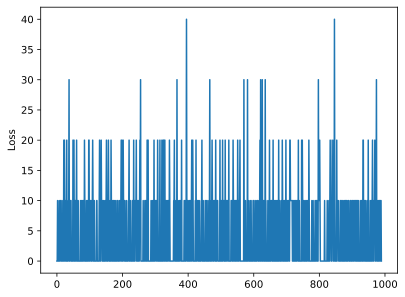

In [11]:
#  训练模型
losses = []
num_epochs = 10
for epoch in range(num_epochs):
    for inputs, targets in loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        losses.append(loss.item())
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

Fig=plt.figure()
plt.plot(range(len(losses)), losses)
plt.ylabel('Loss')
plt.show()

In [12]:
torch.save(model.state_dict(), r'C:\Users\qyypy\Desktop\机器学习综合实践\Save_Model\DNN.pth')